In [11]:
from The_Payne import utils
from The_Payne import spectral_model
import numpy as np
import matplotlib.pyplot as plt
from The_Payne import fitting
import pandas as pd
import seaborn as sns
%matplotlib inline

df = np.loadtxt('/Users/ioanaciuca/Desktop/MockSpectra/Sync_Spectra_All/at12_aaaaa_t04534g2.24.spec')
wavelength_ini=df[:,0]

temp = np.load("/Users/ioanaciuca/Desktop/The_Payne/apogee_NN_normalized_spectra.npz")

w_array_0 = temp["w_array_0"]
w_array_1 = temp["w_array_1"]
w_array_2 = temp["w_array_2"]
b_array_0 = temp["b_array_0"]
b_array_1 = temp["b_array_1"]
b_array_2 = temp["b_array_2"]
x_min = temp["x_min"]
x_max = temp["x_max"]
temp.close()

NN_coeffs = [w_array_0, w_array_1, w_array_2, b_array_0, b_array_1, b_array_2, x_min, x_max]

In [12]:
from scipy import signal
from scipy.stats import norm

import numpy as np
import glob
import pandas as pd
from numpy import load

import sys
sys.path.append('../')

from scripts.spectral_analysis import pipeline_fullw as pipeline

from The_Payne import utils
from The_Payne import spectral_model
from The_Payne import fitting

# the following will be used throughout all routines
# these are the default for fitting APOGEE spectra 
# substitutes them if you train different neural networks for other purposes
# the instruction for training a new Payne is included at the end of this tutorial

# read in the default wavelength array, 
#         the apogee mask/filter used for fitting spectra : True = excluded
wavelength = utils.load_wavelength_array()
mask = utils.load_apogee_mask()

In [13]:
len(wavelength)

7214

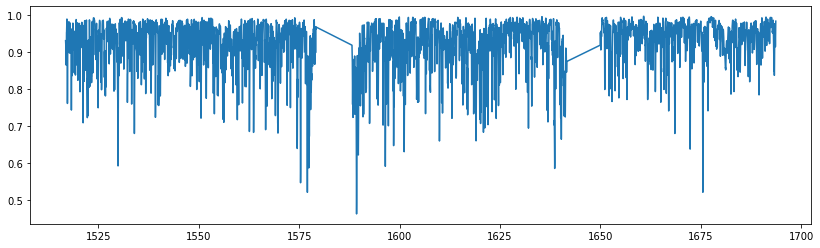

In [14]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg
#set the reference values here...

teff = 4.5
logg = 2.1
vturb = 1.0
ch = 0.0
nh = 0.0
mgh = 0.0
oh = 0.0
sih = 0.0
cah = 0.0
feh = 0.0
alh = 0.0

#22 labels
real_labels = np.array([teff, logg, vturb,\
                         ch, nh, oh, 0.0, 0.,\
                         mgh, alh, sih, 0.0, 0.,\
                         0., cah, 0., 0., 0.,\
                         feh, 0., 0., 0.])

step_size = np.array([0.05, 0.1, 0.1,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05])

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)

waveout, reference_spec = pipeline(wavelength, wavelength_ini, reference_spec)
len(waveout)

fig = plt.subplots(figsize=(14, 4))

plt.plot(waveout, reference_spec)

In [15]:
len(waveout)

7214

In [18]:
nah_lines = np.loadtxt('../lines/nah_lines.txt')
ph_lines = np.loadtxt('../lines/ph_lines.txt')

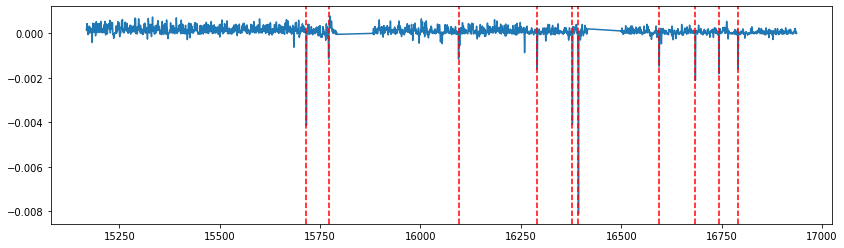

In [19]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg
#set the reference values here...


teff = 4.5
logg = 2.1
vturb = 1.0
ch = 0.0
nh = 0.0
mgh = 0.0
oh = 0.0
sih = 0.0
cah = 0.0
feh = 0.0
alh = 0.0

#22 labels
real_labels = np.array([teff, logg, vturb,\
                         ch, nh, oh, 0.07, \
                         mgh, alh, sih, 0.12, 0.0,\
                         0.0, cah, 0.0, 0.0, 0.0, 0.0,\
                         feh, 0.0, 0.0, 0.0])

step_size = np.array([0.05, 0.1, 0.1,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05, 0.05,\
                       0.05, 0.05, 0.05, 0.05])

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

scaled_labels = np.copy(real_labels)
scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
reference_spec1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)

waveout, reference_spec1 = pipeline(wavelength, wavelength_ini, reference_spec1)
len(waveout)

fig, ax = plt.subplots(figsize=(14, 4))

plt.plot(waveout*10, reference_spec1 - reference_spec)

for x in nah_lines:
    ax.axvline(x=x, color='r', ls='--')

for x in ph_lines:
    ax.axvline(x=x, color='r', ls='--')

> what are the conditioning labels?

#### teff, logg, vturb, mgh, oh, sih, cah, feh, alh, vmacro, ch, nh

set them as reference values. done

what are the free variables...?


In [20]:
fn = '../data/weinberg_apogee_precise_labels.npz'

data = load(fn)
lst = data.files

len(data)

teff = data['teff']

len(data['teff'])
print(lst)
print(len(lst)) #24 labels...

df_labels = pd.DataFrame()

for item in data.files:
    df_labels[item] = data[item]
    
df_labels.head()

['teff', 'logg', 'vturb', 'vmac', 'ch', 'nh', 'ph', 'tih', 'ceh', 'mgh', 'oh', 'sih', 'sh', 'cah', 'nah', 'alh', 'kh', 'crh', 'feh', 'nih', 'vh', 'mnh', 'coh', 'cuh']
24


,teff,logg,vturb,vmac,ch,nh,ph,tih,ceh,mgh,...,nah,alh,kh,crh,feh,nih,vh,mnh,coh,cuh
0,4533.500000,2.24,1.426002,2.872531,-0.016722,0.341739,0.024864,0.049664,-0.039500,0.0370,...,-0.1289,-0.0073,0.0720,0.0512,0.0342,0.0140,-0.0645,0.0880,0.0575,0.0914
1,4135.700195,1.59,1.487168,3.260739,-0.028490,0.051850,-0.143363,-0.191645,-0.320385,0.0582,...,-0.2437,-0.0138,0.0580,-0.1748,-0.1738,-0.1020,-0.1079,-0.1521,-0.0200,-0.0207
2,4536.600098,2.45,1.162532,2.789897,0.156178,0.369030,-0.010953,-0.031105,-0.058509,0.1195,...,0.1531,0.0767,0.1225,0.0444,0.0820,0.1210,0.0755,0.1673,0.1539,0.1778
3,4322.899902,1.63,1.703374,4.048507,-0.519896,-0.340700,-0.353843,-0.357755,-0.608485,-0.4242,...,-0.6550,-0.5411,-0.4153,-0.6526,-0.5428,-0.5351,-0.8350,-0.6074,-0.5141,-0.3320
4,4209.600098,1.51,1.713129,3.443646,-0.263520,-0.050260,-0.121933,-0.035065,-0.393525,-0.1516,...,-0.2528,-0.2409,-0.2021,-0.3149,-0.2743,-0.2564,-0.2546,-0.2461,-0.1786,-0.1413


> approach 1. sample from a uniform space

In [21]:
n = 10000

nah = df_labels.nah
nah_vals = np.random.uniform(min(nah), max(nah), n)

ph = df_labels.ph
ph_vals = np.random.uniform(min(ph), max(ph), n)

sh = df_labels.sh
sh_vals = np.random.uniform(min(sh), max(sh), n)

kh = df_labels.kh
kh_vals = np.random.uniform(min(kh), max(kh), n)

tih = df_labels.tih
tih_vals = np.random.uniform(min(tih), max(tih), n)

vh = df_labels.vh
vh_vals = np.random.uniform(min(vh), max(vh), n)

crh = df_labels.crh
crh_vals = np.random.uniform(min(crh), max(crh), n)

mnh = df_labels.mnh
mnh_vals = np.random.uniform(min(mnh), max(mnh), n)

coh = df_labels.coh
coh_vals = np.random.uniform(min(coh), max(coh), n)

nih = df_labels.nih
nih_vals = np.random.uniform(min(nih), max(nih), n)

cuh = df_labels.cuh
cuh_vals = np.random.uniform(min(cuh), max(cuh), n)

In [36]:
n = 10000

nah_vals = np.random.uniform(-0.5, 0.5, n)
ceh_vals = np.random.uniform(-0.5, 0.5, n)
mgh_vals = np.random.uniform(-0.5, 0.5, n)
sih_vals = np.random.uniform(-0.5, 0.5, n)
alh_vals = np.random.uniform(-0.5, 0.5, n)
ph_vals = np.random.uniform(-0.5, 0.5, n)
sh_vals = np.random.uniform(-0.5, 0.5, n)
kh_vals = np.random.uniform(-0.5, 0.5, n)
tih_vals = np.random.uniform(-0.5, 0.5,n)
vh_vals = np.random.uniform(-0.5, 0.5, n)
crh_vals = np.random.uniform(-0.5, 0.5, n)
mnh_vals = np.random.uniform(-0.5, 0.5, n)
coh_vals = np.random.uniform(-0.5, 0.5, n)
nih_vals = np.random.uniform(-0.5, 0.5, n)
cuh_vals = np.random.uniform(-0.5, 0.5, n)
alh_vals = np.random.uniform(-0.5, 0.5, n)
sih_vals = np.random.uniform(-0.5, 0.5, n)

In [23]:
#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg
#set the reference values here...


teff = 4.5
logg = 2.1
vturb = 1.0
ch = 0.0
nh = 0.0
mgh = 0.0
oh = 0.0
sih = 0.0
cah = 0.0
feh = 0.0
alh = 0.0

#22 labels
real_labels = np.array([teff, logg, vturb,\
                         ch, nh, oh, 0.05, \
                         mgh, alh, sih, 0.05, 0.05,\
                         0.05, cah, 0.05, 0.05, 0.05, 0.05,\
                         feh, 0.05, 0.05, 0.05])

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

def generate_spec(temp_labels):
    #print(temp_labels)
    scaled_labels = np.copy(temp_labels)
    scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
    reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
   
    waveout, reference_spec = pipeline(wavelength, wavelength_ini, reference_spec)


    return waveout, reference_spec



> include 10 labels to condition on, teff, logg, vturb, vmac, ch, nh, oh, cah, ceh, feh

100%|██████████| 1000/1000 [00:29<00:00, 33.80it/s]


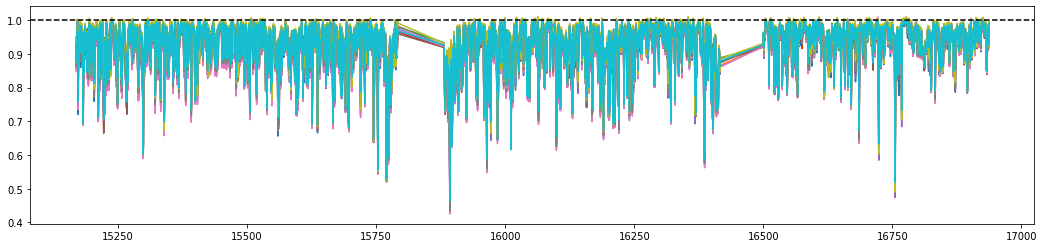

In [38]:

#---------------------------------------------------------------------------------------------------
# reference labels
# apogee-weinberg
#set the reference values here...


teff = 4.5
logg = 2.1
vturb = 1.0
ch = 0.0
nh = 0.0
mgh = 0.0
oh = 0.0
cah = 0.0
feh = 0.0

#22 labels
real_labels = np.array([teff, logg, vturb,\
                         ch, nh, oh, 0.05, \
                         mgh, 0.05, 0.05, 0.05, 0.05,\
                         0.05, cah, 0.05, 0.05, 0.05, 0.05,\
                         feh, 0.05, 0.05, 0.05])

#data = np.vstack([teff, logg,\
#                   vturb, ch, nh, oh, nah, 
#                   mgh, alh, sih, ph, sh, kh, cah,
#                   tih, vh, crh, mnh, feh, coh,nih, cuh  
# does not contain ce/h and v macro as the models that YS gave me

def generate_spec(temp_labels):
    #print(temp_labels)
    scaled_labels = np.copy(temp_labels)
    scaled_labels = (scaled_labels-x_min)/(x_max-x_min) - 0.5
    reference_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels, NN_coeffs = NN_coeffs)
   
    waveout, reference_spec = pipeline(wavelength, wavelength_ini, reference_spec)


    return waveout, reference_spec

df_master = pd.DataFrame()

for i in tqdm(range(1000)):
    
    real_labels[6] = nah_vals[i] #nah
    real_labels[8] = alh_vals[i]
    real_labels[9] = sih_vals[i]
    real_labels[10] = ph_vals[i] #ph
    real_labels[11] = sh_vals[i] #sh
    real_labels[12] = kh_vals[i] #kh
    real_labels[14] = tih_vals[i] #tih
    real_labels[15] = vh_vals[i] #vh
    real_labels[16] = crh_vals[i] #crh
    real_labels[17] = mnh_vals[i] #mnh
    real_labels[19] = coh_vals[i] #coh
    #real_labels[20] = 0
    real_labels[20] = nih_vals[i] #nih 
    real_labels[21] = cuh_vals[i] #cuh
    
    w, s = generate_spec(temp_labels=real_labels)
   # w = w[::3]
    #s = s[::3]
    if i == 0:
        df_master['waves'] = w*10
    df_master['spec'+str(i)] = s

df_pure = df_master.drop(columns=['waves'])

fig, ax = plt.subplots(figsize=(18, 4))

for i in range(1, 11):
    plt.plot(df_master['waves'], df_master.iloc[:, i])
    
ax.axhline(y=1, ls='--', color='k')

In [25]:
df_pure

,spec0,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,...,spec990,spec991,spec992,spec993,spec994,spec995,spec996,spec997,spec998,spec999
0,0.919376,0.923142,0.919914,0.922433,0.934030,0.933002,0.916201,0.922069,0.916993,0.926762,...,0.920616,0.928584,0.916575,0.959420,0.937662,0.931912,0.932320,0.920762,0.913059,0.935563
1,0.909750,0.912842,0.913097,0.914052,0.927491,0.925744,0.904315,0.912727,0.913152,0.918573,...,0.911948,0.919239,0.906190,0.957020,0.927128,0.922622,0.921017,0.910865,0.903773,0.923781
2,0.905296,0.908607,0.911337,0.911104,0.925479,0.923470,0.900817,0.910484,0.912290,0.914867,...,0.909772,0.916045,0.902366,0.955945,0.922635,0.918620,0.916694,0.907849,0.900726,0.919123
3,0.907580,0.910650,0.914775,0.913801,0.928067,0.925744,0.903939,0.914000,0.914806,0.916696,...,0.913060,0.918139,0.905283,0.956507,0.924032,0.920196,0.918640,0.910550,0.904050,0.921021
4,0.910467,0.912584,0.917262,0.915915,0.929361,0.926608,0.907056,0.916966,0.916435,0.917969,...,0.915494,0.919458,0.908136,0.953691,0.925116,0.921295,0.920560,0.912567,0.907226,0.922970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0.910595,0.914132,0.916540,0.915794,0.924123,0.918653,0.911237,0.918633,0.905015,0.913302,...,0.917422,0.914302,0.914559,0.916730,0.920176,0.913444,0.917708,0.915379,0.914292,0.923314
7210,0.917930,0.922716,0.924429,0.924149,0.931775,0.926991,0.919602,0.926140,0.914132,0.921347,...,0.925909,0.922679,0.922474,0.925651,0.927648,0.921255,0.925178,0.923433,0.921930,0.931145
7211,0.943398,0.946445,0.948375,0.948322,0.954690,0.949753,0.943897,0.950035,0.937159,0.944525,...,0.949449,0.945752,0.947917,0.946648,0.950031,0.944738,0.948562,0.946693,0.946410,0.953966
7212,0.971218,0.971204,0.974012,0.973818,0.979042,0.973438,0.969545,0.975797,0.960767,0.968892,...,0.974080,0.969800,0.975454,0.967800,0.973856,0.969722,0.973633,0.971198,0.972656,0.978094


> pixel correlation

In [26]:
df_pixel = df_pure.copy()

In [27]:
df_pixel.head()

,spec0,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,...,spec990,spec991,spec992,spec993,spec994,spec995,spec996,spec997,spec998,spec999
0,0.919376,0.923142,0.919914,0.922433,0.934030,0.933002,0.916201,0.922069,0.916993,0.926762,...,0.920616,0.928584,0.916575,0.959420,0.937662,0.931912,0.932320,0.920762,0.913059,0.935563
1,0.909750,0.912842,0.913097,0.914052,0.927491,0.925744,0.904315,0.912727,0.913152,0.918573,...,0.911948,0.919239,0.906190,0.957020,0.927128,0.922622,0.921017,0.910865,0.903773,0.923781
2,0.905296,0.908607,0.911337,0.911104,0.925479,0.923470,0.900817,0.910484,0.912290,0.914867,...,0.909772,0.916045,0.902366,0.955945,0.922635,0.918620,0.916694,0.907849,0.900726,0.919123
3,0.907580,0.910650,0.914775,0.913801,0.928067,0.925744,0.903939,0.914000,0.914806,0.916696,...,0.913060,0.918139,0.905283,0.956507,0.924032,0.920196,0.918640,0.910550,0.904050,0.921021
4,0.910467,0.912584,0.917262,0.915915,0.929361,0.926608,0.907056,0.916966,0.916435,0.917969,...,0.915494,0.919458,0.908136,0.953691,0.925116,0.921295,0.920560,0.912567,0.907226,0.922970


In [ ]:
df_pixel = df_pixel.T
df_pixel.head()

In [15]:
df_pixel.shape

(100, 1000)

In [43]:
lambda_max = 16200
lambda_min = 15900

m = (waves < lambda_max) & (waves > lambda_min)

df_master = df_master[(df_master.waves < lambda_max) & (df_master.waves > lambda_min)]

In [47]:

df_pure = df_master.drop(columns=['waves'])

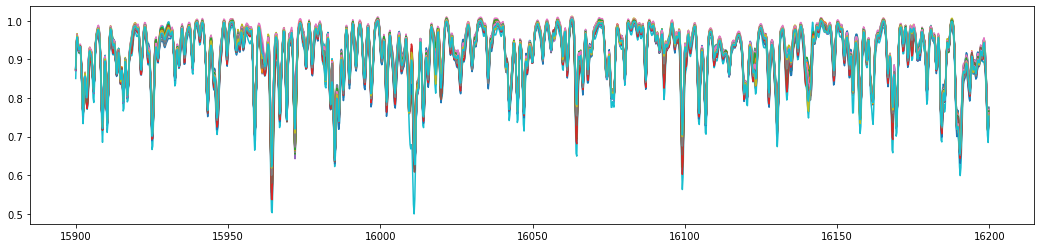

In [56]:
fig = plt.figure(figsize=(18, 4))

for i in range(50):
    plt.plot(df_master.waves, df_pure.iloc[:, i])

<AxesSubplot:>

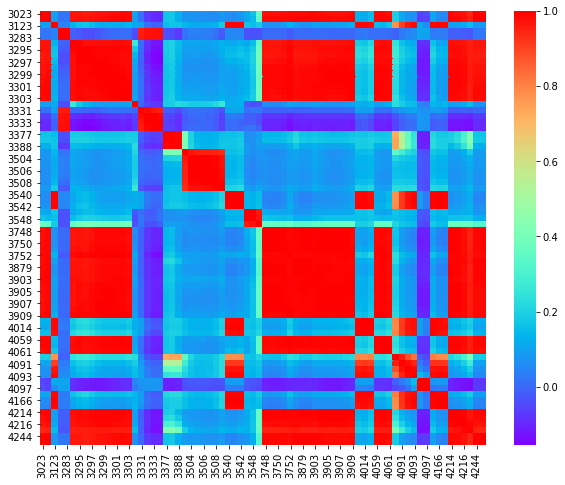

In [51]:
import pandas as pd
import seaborn as sns


df = df_pure.T


df = df.T[df.std(axis=0) > 0.02]
df = df.T


fig = plt.subplots(figsize=(10, 8))

corrMatrix = df.corr()

#corrMatrix = corrMatrix[((corrMatrix > 0.5) | (corrMatrix < -0.5))]

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')


sns.heatmap(corrMatrix, cmap ="rainbow")

In [ ]:
len(df_pure.spec0)


> exploration with the spectra... Need to fix this.

> Then focus on even smaller part of the spectra. Train model on 100 pixels or something


In [54]:
from sklearn.neighbors import NearestNeighbors

nih_lines = np.loadtxt('../lines/nih_lines.txt')
coh_lines = np.loadtxt('../lines/coh_lines.txt')
cuh_lines = np.loadtxt('../lines/cuh_lines.txt')
mnh_lines = np.loadtxt('../lines/mnh_lines.txt')
crh_lines = np.loadtxt('../lines/crh_lines.txt')
vh_lines = np.loadtxt('../lines/vh_lines.txt')
tih_lines = np.loadtxt('../lines/tih_lines.txt')
sh_lines = np.loadtxt('../lines/sh_lines.txt')
nah_lines = np.loadtxt('../lines/nah_lines.txt')

waves = df_master['waves'].values
knn = NearestNeighbors(n_neighbors=1)
knn.fit(waves.reshape(-1, 1))

df = df_pure.copy()

lines = [nih_lines, coh_lines, cuh_lines, mnh_lines, crh_lines, vh_lines, tih_lines, sh_lines, nah_lines]

def line_analysis(line, name, df):

    line_idxes = []

    for i in range(len(line)):
        temp = np.where(line[i] - waves < 0.00001)[0][0]
        line_idxes.append(temp)
        
    #line_idxes = list(set(line_idxes))
    
    df_line = pd.DataFrame()

    i = 0
    for x in line_idxes:
        df_line[name+str(i)] = df.iloc[x].values
        i += 1
    
    return df_line

def linelist_analysis(df, lines):
    
    knn = NearestNeighbors(n_neighbors=1)
    knn.fit(waves.reshape(-1, 1))
    
    nih_lines, coh_lines, cuh_lines, mnh_lines, crh_lines, vh_lines, tih_lines, sh_lines, nah_lines = lines
    names=['nih_line', 'coh_line', 'cuh_line', 'mnh_line', 'crh_line','vh_line', 'tih_line', 'sh_line', 'nah_line']
    
    dfs = []
    
    for i in range(len(lines)):
        df_line = line_analysis(lines[i], names[i], df)
        dfs.append(df_line)
        
    return dfs
    
dfs = linelist_analysis(df, lines)
df_nih, df_coh,  df_cuh, df_mnh, df_crh, df_vh, df_tih, df_sh, df_nah = dfs

fig = plt.figure(figsize=(10, 8))
df_main = pd.concat([df_nih, df_tih, df_nah], axis=1)

corrMatrix = df_main.corr()

corrMatrix = corrMatrix[((corrMatrix > 0.3) | (corrMatrix < -0.3))]

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, cmap ="rainbow")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [32]:
import numpy as np
from sklearn import random_projection

transformer = random_projection.SparseRandomProjection()

In [80]:
from sklearn.datasets import make_blobs
from sklearn.random_projection import SparseRandomProjection
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df_main = pd.concat([df_nih, df_tih, df_nah, df_mnh], axis=1)

df_x = df_main.T.to_numpy()
# Projecting the data to 1000 dimensions.
srp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_srp = srp.fit_transform(corrMatrix)

In [52]:
df_main.shape

y = df_main.columns.values

y.shape

(96,)

In [49]:
corrMatrix.shape

(96, 96)

(50,)

In [44]:
X_srp.shape

(96, 2)

In [ ]:
np.savetxt('/Users/ioanaciuca/Desktop/X.csv', df_x)

In [ ]:
test = np.loadtxt('/Users/ioanaciuca/Desktop/X.csv')
test.shape

In [ ]:
df_x.shape

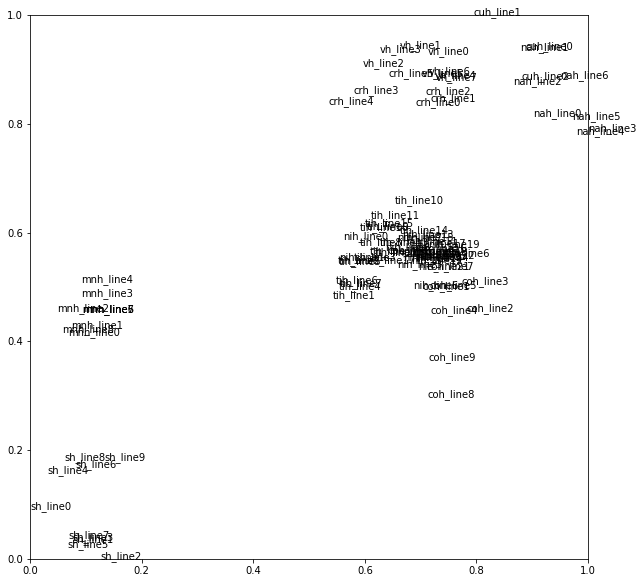

In [67]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]))

   # plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
plot_embedding(X_srp, title=None)

In [72]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# vis
import altair as alt
alt.renderers.enable("default")
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [69]:
# function to generate FSD
#def feature_space_diagram(data, target_name = None):
df = df_main.copy()
corr = np.round(df.corr(),2)

In [73]:
target_name = None

if target_name is not None:
    target_corr = np.abs(corr.rename({target_name:"target_corr"}, axis=1)["target_corr"])
    df = df.drop(target_name, axis=1)
    corr = corr.drop(target_name, axis=1).drop(target_name, axis=0)
        
sidebar_width = 200
sidebar_component_height = 75

#compute PCA and store as X,Y coordinates for each feature
pca = PCA(n_components = 2)
pca.fit(np.abs(corr))
pca_coords = pd.DataFrame.from_dict(
    dict(
        zip(
            list(df.columns),
            pca.transform(np.abs(corr)).tolist()
        )
    ),
    orient="index"
).reset_index().rename({0:"X", 1:"Y", "index":"feature"}, axis=1)

In [75]:
# set correlation with target, if using, which determines circle size
if target_name is not None:
    pca_coords = pca_coords.join(
        target_corr
    ).reset_index()
else:
    pca_coords = pca_coords.reset_index()
    pca_coords["target_corr"] = 1

In [83]:
from sklearn.datasets import make_blobs
from sklearn.random_projection import SparseRandomProjection
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [87]:

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# vis
import altair as alt
alt.renderers.enable("default")
alt.data_transformers.disable_max_rows()

# import data
# from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
breast_cancer_dataset = datasets.load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
breast_cancer_df["diagnosis"] = breast_cancer_dataset["target"]

# function to generate FSD
def feature_space_diagram(data, target_name = None):
    df = data.copy()
    corr = np.round(df.corr(),2)
    if target_name is not None:
        target_corr = np.abs(corr.rename({target_name:"target_corr"}, axis=1)["target_corr"])
        df = df.drop(target_name, axis=1)
        corr = corr.drop(target_name, axis=1).drop(target_name, axis=0)
        
    sidebar_width = 200
    sidebar_component_height = 75

    #compute PCA and store as X,Y coordinates for each feature
    pca = PCA(n_components = 2)
    pca.fit(np.abs(corr))
    pca_coords = pd.DataFrame.from_dict(
        dict(
            zip(
                list(df.columns),
                pca.transform(np.abs(corr)).tolist()
            )
        ),
        orient="index"
    ).reset_index().rename({0:"X", 1:"Y", "index":"feature"}, axis=1)

    #get feature clusters
    scaler = StandardScaler()
    feature_distances = squareform(pdist(scaler.fit_transform(df).T, "euclidean"))
    silhouette_scores = []
    cluster_range = range(3,df.shape[1])

    for n_cluster in cluster_range:
        corr_clusters = FeatureAgglomeration(n_clusters = n_cluster, affinity = "precomputed", linkage = "average").fit(feature_distances)
        silhouette_scores = silhouette_scores\
        + [
            {
                "cluster_num": n_cluster,
                "silhouette_score": silhouette_score(feature_distances, corr_clusters.labels_, metric = "precomputed"),
                "feature": list(df.columns)[i],
                "cluster": label 
            }
            for i, label in enumerate(corr_clusters.labels_)
        ]

    cluster_label_df = pd.DataFrame(silhouette_scores)
    cluster_label_df["cluster_size"] = cluster_label_df.groupby(["cluster_num", "cluster"])["feature"].transform("count")
    cluster_label_df["key"] = cluster_label_df["cluster_num"].astype(str).str.cat(cluster_label_df["feature"].astype(str), sep=":")

    cluster_label_df["cluster"] = cluster_label_df.groupby(["cluster_num","cluster"])["feature"].transform("first")

    default_cluster_num = cluster_label_df.groupby("cluster_num")["silhouette_score"].max().idxmax()

    # set correlation with target, if using, which determines circle size
    if target_name is not None:
        pca_coords = pca_coords.join(
            target_corr
        ).reset_index()
    else:
        pca_coords = pca_coords.reset_index()
        pca_coords["target_corr"] = 1

    # get dataset for lines between features (if they have higher correlation than corr_threshold)
    corr_lines = corr.reset_index(drop=False).rename({"index":"feature"}, axis=1)\
        .melt(id_vars = ["feature"], var_name = "feature_2", value_name = "corr")\
        .query("feature > feature_2")

    corr_lines["corr_abs"] = np.abs(corr_lines["corr"])
    corr_selector_data = corr_lines.copy()
    corr_selector_data["corr_abs"] = np.floor((corr_selector_data["corr_abs"]*10))/10
    corr_selector_data = corr_selector_data.groupby("corr_abs").size().reset_index().rename({0:"Count"}, axis = 1)
    corr_lines_1 = pd.merge(
        corr_lines, 
        pca_coords.loc[:,["feature", "X", "Y"]], 
        on = "feature"
    )
    corr_lines_2 = pd.merge(
        corr_lines, 
        pca_coords.set_index("feature").loc[:,["X", "Y"]],
        left_on = "feature_2", right_index = True
    )
    corr_lines = corr_lines_1.append(corr_lines_2)
    corr_lines["key"] = corr_lines["feature"] + corr_lines["feature_2"]

    corr_line_selector = alt.selection_single(fields = ["corr_abs"], init = {"corr_abs":0.7})
    cluster_num_selector = alt.selection_single(fields = ["cluster_num"], init = {"cluster_num":default_cluster_num})
    cluster_selection = alt.selection_single(fields=["cluster"])

    base = alt.layer().encode(
        x = alt.X("X", axis=None),
        y = alt.Y("Y", axis=None),
        color = alt.condition(
            cluster_selection,
            alt.Color("cluster:N", legend = None),
            alt.value("lightgray")
        )
    )

    base += alt.Chart(pca_coords).mark_circle().encode(
        size = alt.Size("target_corr:Q", scale=alt.Scale(domain = [0,1]), legend=None)
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    ).add_selection(
        cluster_num_selector
    )

    base += alt.Chart(pca_coords).mark_text(dx=20, dy = 10).encode(
        text = "feature",
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    )

    base += alt.Chart(corr_lines).mark_line().encode(
        detail = "key",
        strokeWidth = alt.StrokeWidth("corr_abs", scale = alt.Scale(domain = [0,1], range = [.3,3]))
    ).transform_filter(
        alt.datum.corr_abs >= corr_line_selector.corr_abs
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    )

    base = base.properties(
        width = 800, 
        height = 500,
        title = "Feature Space Diagram"
    ).interactive()

    num_cluster_picker = alt.Chart(cluster_label_df).mark_bar().encode(
        y = alt.Y("silhouette_score", title = "Silhouette Score"),
        x = "cluster_num:O",
        color = alt.condition(
            cluster_num_selector, 
            alt.value("lightblue"), 
            alt.value("lightgray")
        )            
    ).add_selection(
        cluster_num_selector
    ).properties(
        width = sidebar_width,
        height = sidebar_component_height,
        title = "Select the Number of Clusters"
    )

    corr_threshold_picker = alt.Chart(corr_selector_data).mark_bar().encode(
        x = "corr_abs:O",
        y = alt.Y("Count", axis = alt.Axis(labelAngle = 0, title = "Feature Pairs")),
        color = alt.condition(
            alt.datum.corr_abs >= corr_line_selector.corr_abs, 
            alt.value("lightblue"), 
            alt.value("lightgray")
        )
    ).add_selection(
        corr_line_selector
    ).properties(
        width = sidebar_width,
        height = sidebar_component_height,
        title = "Select Correlation Threshold to Show Lines"
    )

    cluster_bar_chart = alt.Chart(cluster_label_df).mark_bar(size=5).encode(
        y = alt.Y(
            "cluster:N", 
            sort = alt.EncodingSortField(field = "cluster_size", order="descending"),
            title = None #  "Clusters"
        ),
        x = "cluster_size",
        color = alt.Color("cluster:N", legend=None),
    ).add_selection(
        cluster_selection
    ).transform_filter(
        (alt.datum.cluster_num >= cluster_num_selector.cluster_num) & (alt.datum.cluster_num <= cluster_num_selector.cluster_num)
    ).properties(
        width = sidebar_width,
        height = 200,
        title = "Cluster Sizes. Click to Highlight"
    )        

    return (base) | (num_cluster_picker & corr_threshold_picker & cluster_bar_chart)

# call function and render chart
feature_space_diagram(df_main)



alt.HConcatChart(...)

In [108]:

import numpy as np
import pandas as pd
from scipy.cluster import hierarchy as hc
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# vis
import altair as alt
alt.renderers.enable("default")
alt.data_transformers.disable_max_rows()
import plotly.graph_objects as go
import plotly.figure_factory as ff

def visualize_feature_correlation(data, chart_type, target_name = None, cluster_scope = None, user_defined_clusters = None):
    df = data.copy()
    corr = np.round(df.corr(),2)
    if target_name is not None:
        target_corr = np.abs(corr.rename({target_name:"target_corr"}, axis=1)["target_corr"])
        df = df.drop(target_name, axis=1)
        corr = corr.drop(target_name, axis=1).drop(target_name, axis=0)
    default_feature_order = sorted(list(df.columns))
    corr_condensed = hc.distance.squareform(1 - np.abs(df.corr()) ) # convert to condensed
    z = hc.linkage(corr_condensed, method='average');
    feature_order = hc.dendrogram(z, labels=df.columns, no_plot=True)["ivl"];  
    if chart_type == "dendrogram":    
        fig = ff.create_dendrogram(
            1 - np.abs(corr), 
            labels = df.columns
        )
        fig.update_layout(width=800, height=500)
        fig.show()
    elif chart_type == "punchcard":
        heatmap_data = corr.reset_index(drop = False).melt(id_vars="index")
        base = alt.Chart(
            heatmap_data
        ).encode(
            x = alt.X("index", sort = feature_order, axis=None),
            y = alt.Y("variable", sort = feature_order, axis=None)
        ).transform_calculate(
            abs_val = 'abs(datum.value)',
            positive_corr = 'datum.value > 0'
        ).transform_lookup(
            lookup='index',
            from_=alt.LookupData(
                data=pd.DataFrame(feature_order).reset_index(drop=False).rename({"index":"order_X", 0:"feature"}, axis=1),
                key='feature',
                fields=['order_X']
            )
        ).transform_lookup(
            lookup='variable',
            from_=alt.LookupData(
                data=pd.DataFrame(feature_order).reset_index(drop=False).rename({"index":"order_Y", 0:"feature"}, axis=1),
                key='feature',
                fields=['order_Y']
            )
        ).properties(
            width = 700,
            height = 500
        )

        circles = base.mark_circle().encode(
            color = "positive_corr:N",
            size = alt.condition(
                "datum.order_Y >= datum.order_X",
                alt.value(0),
                alt.Size(
                    "abs_val:Q", 
                    scale=alt.Scale(range=[0,1000], domain=[0,1])
                )
            )
        )
        text = base.mark_text(align="right").encode(
            text = "index",
            opacity = alt.condition("datum.order_Y == datum.order_X", alt.value(1), alt.value(0))
        )
        return (text+circles).resolve_scale(y = "shared", x="shared")
    elif chart_type == "heatmap":
        heatmap_data = corr.reset_index(drop = False).melt(id_vars="index")
        base = alt.Chart(
            heatmap_data
        ).encode(
            x = alt.X("index", sort = feature_order, axis = alt.Axis(labelAngle=15)),
            y = alt.Y("variable", sort = feature_order)
        ).transform_calculate(
            abs_val = 'abs(datum.value)'
        ).properties(
            width = 600,
            height = 600
        )

        rects = base.mark_rect().encode(
            color = alt.Color("abs_val:Q", scale=alt.Scale(domain=[0,1])),
        )
        text = base.mark_text(align="center").encode(
            text = "value",
            color = alt.condition(
                "datum.value < .5",
                alt.value("black"),
                alt.value("white")
            )
        )
        return (rects+text).resolve_scale(y = "shared", x="shared")
    elif chart_type == "clusters":
        
        sidebar_width = 200
        sidebar_component_height = 75
        
        #compute PCA and store as X,Y coordinates for each feature
        pca = PCA(n_components = 2)
        pca.fit(np.abs(corr))
        pca_coords = pd.DataFrame.from_dict(
            dict(
                zip(
                    list(df.columns),
                    pca.transform(np.abs(corr)).tolist()
                )
            ),
            orient="index"
        ).reset_index().rename({0:"X", 1:"Y", "index":"feature"}, axis=1)
        
        if user_defined_clusters:
            
            num_labels = np.unique(user_defined_clusters.values()).shape[0]
            silhouette_scores = [
                {
                    "cluster_num": num_labels, 
                    "silhouette_score": 1, 
                    "feature": col,
                    "cluster": user_defined_clusters[col]
                }
                for col in df.columns
            ]
        else:
        
            #get feature clusters via another method
            scaler = StandardScaler()
            feature_distances = squareform(pdist(scaler.fit_transform(df).T, "euclidean"))
            silhouette_scores = []
            if cluster_scope is None:
                cluster_range = range(3,df.shape[1])
            elif isinstance(cluster_scope, int):
                cluster_range = range(cluster_scope, cluster_scope + 1)
            else:
                cluster_range = cluster_scope #range object
            for n_cluster in cluster_range:
                corr_clusters = FeatureAgglomeration(n_clusters = n_cluster, affinity = "precomputed", linkage = "average").fit(feature_distances)
                silhouette_scores = silhouette_scores\
                + [
                    {
                        "cluster_num": n_cluster,
                        "silhouette_score": silhouette_score(feature_distances, corr_clusters.labels_, metric = "precomputed"),
                        "feature": list(df.columns)[i],
                        "cluster": label 
                    }
                    for i, label in enumerate(corr_clusters.labels_)
                ]
        
        cluster_label_df = pd.DataFrame(silhouette_scores)
        cluster_label_df["cluster_size"] = cluster_label_df.groupby(["cluster_num", "cluster"])["feature"].transform("count")
        cluster_label_df["key"] = cluster_label_df["cluster_num"].astype(str).str.cat(cluster_label_df["feature"].astype(str), sep=":")
        
        cluster_label_df["cluster"] = cluster_label_df.groupby(["cluster_num","cluster"])["feature"].transform("first")
        
        default_cluster_num = cluster_label_df.groupby("cluster_num")["silhouette_score"].max().idxmax()
        
        # set correlation with target, if using, which determines circle size
        if target_name is not None:
            pca_coords = pca_coords.join(
                target_corr
            ).reset_index()
        else:
            pca_coords = pca_coords.reset_index()
            pca_coords["target_corr"] = 1
            
        # get dataset for lines between features (if they have higher correlation than corr_threshold)
        corr_lines = corr.reset_index(drop=False).rename({"index":"feature"}, axis=1)\
            .melt(id_vars = ["feature"], var_name = "feature_2", value_name = "corr")\
            .query("feature > feature_2")
        
        corr_lines["corr_abs"] = np.abs(corr_lines["corr"])
        corr_selector_data = corr_lines.copy()
        corr_selector_data["corr_abs"] = np.floor((corr_selector_data["corr_abs"]*10))/10
        corr_selector_data = corr_selector_data.groupby("corr_abs").size().reset_index().rename({0:"Count"}, axis = 1)
        corr_lines_1 = pd.merge(
            corr_lines, 
            pca_coords.loc[:,["feature", "X", "Y"]], 
            on = "feature"
        )
        corr_lines_2 = pd.merge(
            corr_lines, 
            pca_coords.set_index("feature").loc[:,["X", "Y"]],
            left_on = "feature_2", right_index = True
        )
        corr_lines = corr_lines_1.append(corr_lines_2)
        corr_lines["key"] = corr_lines["feature"] + corr_lines["feature_2"]
        
        corr_line_selector = alt.selection_single(fields = ["corr_abs"], init = {"corr_abs":0.7})
        cluster_num_selector = alt.selection_single(fields = ["cluster_num"], init = {"cluster_num":default_cluster_num})
        cluster_selection = alt.selection_single(fields=["cluster"])
        
        base = alt.layer().encode(
            x = alt.X("X", axis=None),
            y = alt.Y("Y", axis=None),
            color = alt.condition(
                cluster_selection,
                alt.Color("cluster:N", legend = None),
                alt.value("lightgray")
            )
        )
        
        base += alt.Chart(pca_coords).mark_circle().encode(
            size = alt.Size("target_corr:Q", scale=alt.Scale(domain = [0,1]), legend=None)
        ).transform_calculate(
            key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
        ).transform_lookup(
            lookup='key',
            from_=alt.LookupData(data=cluster_label_df, key='key',
                                 fields=['cluster_size', 'cluster'])            
        ).add_selection(
            cluster_num_selector
        )
        
        base += alt.Chart(pca_coords).mark_text(dx=20, dy = 10).encode(
            text = "feature",
        ).transform_calculate(
            key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
        ).transform_lookup(
            lookup='key',
            from_=alt.LookupData(data=cluster_label_df, key='key',
                                 fields=['cluster_size', 'cluster'])            
        )
        
        base += alt.Chart(corr_lines).mark_line().encode(
            detail = "key",
            strokeWidth = alt.StrokeWidth("corr_abs", scale = alt.Scale(domain = [0,1], range = [.3,3]))
        ).transform_filter(
            alt.datum.corr_abs >= corr_line_selector.corr_abs
        ).transform_calculate(
            key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
        ).transform_lookup(
            lookup='key',
            from_=alt.LookupData(data=cluster_label_df, key='key',
                                 fields=['cluster_size', 'cluster'])            
        )
        
        base = base.properties(
            width = 800, 
            height = 500,
            title = "Feature Space Diagram"
        ).interactive()
        
        num_cluster_picker = alt.Chart(cluster_label_df).mark_bar().encode(
            y = alt.Y("silhouette_score", title = "Silhouette Score"),
            x = "cluster_num:O",
            color = alt.condition(
                cluster_num_selector, 
                alt.value("lightblue"), 
                alt.value("lightgray")
            )            
        ).add_selection(
            cluster_num_selector
        ).properties(
            width = sidebar_width,
            height = sidebar_component_height,
            title = "Select the Number of Clusters"
        )
        
        corr_threshold_picker = alt.Chart(corr_selector_data).mark_bar().encode(
            x = "corr_abs:O",
            y = alt.Y("Count", axis = alt.Axis(labelAngle = 0, title = "Feature Pairs")),
            color = alt.condition(
                alt.datum.corr_abs >= corr_line_selector.corr_abs, 
                alt.value("lightblue"), 
                alt.value("lightgray")
            )
        ).add_selection(
            corr_line_selector
        ).properties(
            width = sidebar_width,
            height = sidebar_component_height,
            title = "Select Correlation Threshold to Show Lines"
        )
        
        cluster_bar_chart = alt.Chart(cluster_label_df).mark_bar(size=5).encode(
            y = alt.Y(
                "cluster:N", 
                sort = alt.EncodingSortField(field = "cluster_size", order="descending"),
                title = None #  "Clusters"
            ),
            x = "cluster_size",
            color = alt.Color("cluster:N", legend=None),
        ).add_selection(
            cluster_selection
        ).transform_filter(
            (alt.datum.cluster_num >= cluster_num_selector.cluster_num) & (alt.datum.cluster_num <= cluster_num_selector.cluster_num)
        ).properties(
            width = sidebar_width,
            height = 200,
            title = "Cluster Sizes. Click to Highlight"
        )      
        
        return (base) | (num_cluster_picker & corr_threshold_picker & cluster_bar_chart)
        
df_main = pd.concat([df_nih, df_tih, df_nah], axis=1)


In [126]:

df_main = pd.concat([df_nih, df_tih, df_nah, df_mnh], axis=1)

visualize_feature_correlation(df_main, "heatmap").properties(title="test")

alt.LayerChart(...)

In [127]:
visualize_feature_correlation(df_main, "clusters")

alt.HConcatChart(...)

In [ ]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                   
                    discriminant_analysis, random_projection)

In [ ]:
from time import time
n_neighbors = 30

t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(df_x)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


In [ ]:
X_iso.shape

plt.scatter(X_iso[:, 0], X_iso[:, 1])

In [ ]:
df_x.shape

In [ ]:
df_x.shape

In [ ]:
len(df_x[0])

In [ ]:
len(X[0])

In [ ]:
plt.scatter(df_main.tih_line10, df_main.tih_line1)



In [ ]:
sns.kdeplot(df_main.tih_line11)
sns.kdeplot(df_main.tih_line1)
sns.kdeplot(df_main.tih_line2)

In [ ]:

tih_lines = np.loadtxt('./tih_lines.txt')
print(len(tih_lines))


idxes = []

for i in range(len(tih_lines)):

    idx = np.where(tih_lines[i] - waves < 0.00001)[0][0]
    
    idxes.append(idx)
    
#idxes = list(set(idxes))
    
df_line = pd.DataFrame()

i = 0
for x in idxes:
    df_line['line'+str(i)] = df.iloc[x].values
    i += 1
    

print(idxes)

In [ ]:
idxes[10]

In [ ]:
df.iloc.tih_lines[5]

In [ ]:
df_line = df_line.drop(['line12'], axis='columns')

In [ ]:
df_line


In [ ]:
corrMatrix = df_line.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, cmap ="rainbow")

In [ ]:
len(line_idxes)

In [ ]:
idxes

In [ ]:
np.where(tih_lines[2] == waves)[0]

In [ ]:
df_line = pd.DataFrame()

    i = 0
    for x in line_idxes:
        df_line[name+str(i)] = df.iloc[x].values
        i += 1
    
    return df_line

In [ ]:
all_lines = [nih_lines, coh_lines, cuh_lines, mnh_lines, crh_lines, vh_lines, tih_lines, sh_lines, nah_lines]

fig, ax = plt.subplots(figsize=(20, 4))

plt.plot(waves, df.spec0, color='k')
for x in nih_lines:
    ax.axvline(x=x, color='r', ls='--')
    
for x in tih_lines:
   ax.axvline(x=x, color='g', ls='--')
    
#for x in nah_lines:
#    ax.axvline(x=x, color='b', ls='--')


In [ ]:
plt.scatter(df_tih.tih_line19, df_tih.tih_line7)

In [ ]:
plt.scatter(df_tih.tih_line19, df_tih.tih_line5)

In [ ]:
len(tih_lines)

> have to debug this

In [ ]:
fig = plt.figure(figsize=(14, 4))

plt.plot(waves, df.spec0 - df.spec1)

In [ ]:
plt.scatter(df_main.nih_line9, df_main.nih_line12)


In [ ]:
corrMatrix.head(50)


In [ ]:
print(_NAI_lines)

In [ ]:
len(waves)

In [ ]:
_TII_lines

> with the lines from apogee

In [ ]:

import apogee

from apogee.tools import wv2pix,pix2wv
from apogee.spec.plot import _SII_lines,_CAI_lines,_FEI_lines,_MGI_lines,_ALI_lines,_SI_lines,_KI_lines,_TII_lines,_VI_lines,_CRI_lines,_MNI_lines,_COI_lines,_NII_lines,_CUI_lines,_NAI_lines,_OH_lines,_CO_lines,_CN_lines
 #[_SII_lines,
linelist =[_CAI_lines,_FEI_lines,_MGI_lines,_ALI_lines] #,_SI_lines,_KI_lines,_TII_lines,_VI_lines,_CRI_lines,_MNI_lines,_COI_lines,_NII_lines,_CUI_lines,_NAI_lines,_OH_lines,_CO_lines,_CN_lines]



from sklearn.neighbors import NearestNeighbors

nih_lines = _NII_lines
coh_lines = _COI_lines
cuh_lines = _CUI_lines
mnh_lines = _MNI_lines
crh_lines = _CRI_lines
vh_lines = _VI_lines
tih_lines = _TII_lines
sh_lines = _SI_lines
nah_lines = _NAI_lines

waves = df_master['waves'].values
knn = NearestNeighbors(n_neighbors=1)
knn.fit(waves.reshape(-1, 1))

df = df_pure.copy()

lines = [nih_lines, coh_lines, cuh_lines, mnh_lines, crh_lines, vh_lines, tih_lines, sh_lines, nah_lines]

def line_analysis(line, name, df):

    line_idxes = []
    
    for j in range(len(line)):
        temp = knn.kneighbors(np.array([line[j]], dtype='f').reshape(1, -1), return_distance=False) #this will change 
        line_idxes.append(temp[0][0])
        
    line_idxes = list(set(line_idxes))
    
    df_line = pd.DataFrame()

    i = 0
    for x in line_idxes:
        df_line[name+str(i)] = df.iloc[x].values
        i += 1
    
    return df_line

def linelist_analysis(df, lines):
    
    knn = NearestNeighbors(n_neighbors=1)
    knn.fit(waves.reshape(-1, 1))
    
    nih_lines, coh_lines, cuh_lines, mnh_lines, crh_lines, vh_lines, tih_lines, sh_lines, nah_lines = lines
    names=['nih_line', 'coh_line', 'cuh_line', 'mnh_line', 'crh_line','vh_line', 'tih_line', 'sh_line', 'nah_line']
    
    dfs = []
    
    for i in range(len(lines)):
        df_line = line_analysis(lines[i], names[i], df)
        dfs.append(df_line)
        
    return dfs
    
dfs = linelist_analysis(df, lines)
df_nih, df_coh,  df_cuh, df_mnh, df_crh, df_vh, df_tih, df_sh, df_nah = dfs


fig = plt.figure(figsize=(10, 8))
df_main = pd.concat([df_nih, df_coh, df_mnh, df_cuh, df_crh, df_vh, df_tih, df_sh, df_nah], axis=1)
#df_main = pd.concat([df_nih,df_tih], axis=1)
corrMatrix = df_main.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, cmap ="rainbow")

> look at the training spectra

In [ ]:
spectra = pd.read_hdf('../data/apogee_batch_Xtrain_full.h5')

In [ ]:
spectra.shape

In [ ]:
#look at the pixel correlation for all the data

fig = plt.subplots(figsize=(10, 8))

_df = spectra[::50].T.copy()

corrMatrix = _df.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, mask=mask, cmap ="rainbow")

In [ ]:
#look at the pixel correlation for all the data, assuming an intrisec variation in the pixel values...

spec = spectra.T[::50]
spec.shape

fig = plt.subplots(figsize=(10, 8))

_df = spec.T[spec.std(axis=0) > 0.05]
_df = _df.T
print(_df.shape)

corrMatrix = _df.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, mask=mask, cmap ="rainbow")

In [ ]:
_df.T

> approach 2. sample a sub-space of the label space and use that for the correlation plot and see what you get.

In [ ]:
df_subset = df_labels.sample(1000)

from tqdm import tqdm

df_master = pd.DataFrame()

for i in tqdm(range(500)):
    real_labels[6] = 0#df_subset.nah.values[i] #nah
    real_labels[10] = 0#df_subset.ph.values[i]
    real_labels[11] = 0#df_subset.sh.values[i]
    real_labels[12] = 0#df_subset.kh.values[i]
    real_labels[14] = 0#df_subset.tih.values[i] #tih
    real_labels[15] = 0#df_subset.vh.values[i] #vh
    real_labels[16] = 0#df_subset.crh.values[i] #crh
    real_labels[17] = 0#df_subset.mnh.values[i] #mnh
    real_labels[19] = 0#df_subset.coh.values[i] #coh
    real_labels[20] = 0#df_subset.nih.values[i] #nih 
    real_labels[21] = df_subset.cuh.values[i] #cuh

    w, s = generate_spec(temp_labels=real_labels)
    w = w[::9]
    s = s[::9]
    if i == 0:
        df_master['waves'] = w*10
    df_master['spec'+str(i)] = s

df_pure_u = df_master.drop(columns=['waves'])

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 8))

ax1.plot(w*10, df_pure_u['spec0'], color='k', label='[Cu/H]='+str(df_subset.cuh.values[0]))
ax2.plot(w*10, df_pure_u['spec1'], color='k', label='[Cu/H]='+str(df_subset.cuh.values[1]) )
ax3.plot(w*10, df_pure_u['spec2'], color='k', label='[Cu/H]='+str(df_subset.cuh.values[2]) )
ax4.plot(w*10, df_pure_u['spec0'] - df_pure['spec1'], label='spec0 - spec 1')
ax5.plot(w*10, df_pure_u['spec0'] - df_pure['spec2'], label='spec0 - spec 2')

ax1.set_ylim(0.5, 1.0)
ax2.set_ylim(0.5, 1.0)
ax3.set_ylim(0.5, 1.0)
ax4.set_ylim(-0.03, 0.03)
ax5.set_ylim(-0.03, 0.03)

for x in cuh_lines:
  ax1.axvline(x=x, color='r', ls='--')
  ax2.axvline(x=x, color='r', ls='--')
  ax3.axvline(x=x, color='r', ls='--')
  #ax4.axvline(x=x, color='r', ls='--')
  #ax5.axvline(x=x, color='r', ls='--')
    
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

In [ ]:
from tqdm import tqdm

df_master = pd.DataFrame()

for i in tqdm(range(500)):
    real_labels[6] = df_subset.nah.values[i] #nah
    real_labels[10] = df_subset.ph.values[i]
    real_labels[11] = df_subset.sh.values[i]
    real_labels[12] = df_subset.kh.values[i]
    real_labels[14] = df_subset.tih.values[i] #tih
    real_labels[15] = df_subset.vh.values[i] #vh
    real_labels[16] = df_subset.crh.values[i] #crh
    real_labels[17] = df_subset.mnh.values[i] #mnh
    real_labels[19] = df_subset.coh.values[i] #coh
    real_labels[20] = df_subset.nih.values[i] #nih 
    real_labels[21] = df_subset.cuh.values[i] #cuh

    w, s = generate_spec(temp_labels=real_labels)
    w = w[::9]
    s = s[::9]
    if i == 0:
        df_master['waves'] = w*10
    df_master['spec'+str(i)] = s

df_pure = df_master.drop(columns=['waves'])

In [ ]:
fig = plt.figure(figsize=(18, 4))

for i in range(1, 101):
    plt.plot(df_master['waves'], df_master.iloc[:, i])

In [ ]:
import pandas as pd
import seaborn as sns

fig = plt.subplots(figsize=(10, 8))

df_pure = df_pure.T
corrMatrix = df_pure.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, cmap ="rainbow")

In [ ]:
import pandas as pd
import seaborn as sns

fig = plt.subplots(figsize=(10, 8))

df_pure = df_pure.T
corrMatrix = df_pure.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, cmap ="rainbow")

In [ ]:
df_pure

In [ ]:
import numpy as np

nih_lines = np.loadtxt('./nih_lines.txt')
coh_lines = np.loadtxt('./coh_lines.txt')
cuh_lines = np.loadtxt('./cuh_lines.txt')
mnh_lines = np.loadtxt('./mnh_lines.txt')
crh_lines = np.loadtxt('./crh_lines.txt')
vh_lines = np.loadtxt('./vh_lines.txt')
tih_lines = np.loadtxt('./tih_lines.txt')

from sklearn.neighbors import NearestNeighbors

waves = df_master['waves'].values
knn = NearestNeighbors(n_neighbors=1)
knn.fit(waves.reshape(-1, 1))

df = df_pure.copy()

linelist = mnh_lines
mnh_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    mnh_idxes.append(temp[0][0])
    
mnh_idxes = list(set(mnh_idxes))

new_df = df.T

df_mnh = pd.DataFrame()
name = 'mnh_line'
i = 0
for x in mnh_idxes:

    df_mnh[name+str(i)] = new_df.iloc[x].values
    i += 1
    
linelist = cuh_lines
cuh_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    cuh_idxes.append(temp[0][0])
    
cuh_idxes = list(set(cuh_idxes))

new_df = df.T

df_cuh = pd.DataFrame()
name = 'cuh_line'
i = 0
for x in cuh_idxes:

    df_cuh[name+str(i)] = new_df.iloc[x].values
    i += 1
    
linelist = crh_lines
crh_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    crh_idxes.append(temp[0][0])
    
crh_idxes = list(set(crh_idxes))

new_df = df.T

df_crh = pd.DataFrame()
name = 'crh_line'
i = 0
for x in crh_idxes:

    df_crh[name+str(i)] = new_df.iloc[x].values
    i += 1
    
sh_lines = np.loadtxt('./sh_lines.txt')

linelist = sh_lines
sh_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    sh_idxes.append(temp[0][0])
    
sh_idxes = list(set(sh_idxes))

new_df = df.T

df_sh = pd.DataFrame()
name = 'sh_line'
i = 0
for x in sh_idxes:

    df_sh[name+str(i)] = new_df.iloc[x].values
    i += 1

nah_lines = np.loadtxt('./nah_lines.txt')

linelist = nah_lines
nah_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    nah_idxes.append(temp[0][0])
    
nah_idxes = list(set(nah_idxes))

new_df = df.T

df_nah = pd.DataFrame()
name = 'nah_line'
i = 0
for x in nah_idxes:

    df_nah[name+str(i)] = new_df.iloc[x].values
    i += 1
    
linelist = vh_lines
vh_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    vh_idxes.append(temp[0][0])
    
vh_idxes = list(set(vh_idxes))

new_df = df.T

df_vh = pd.DataFrame()
name = 'vh_line'
i = 0
for x in vh_idxes:

    df_vh[name+str(i)] = new_df.iloc[x].values
    i += 1
    
linelist = tih_lines
tih_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    tih_idxes.append(temp[0][0])
    
tih_idxes = list(set(tih_idxes))

new_df = df.T

df_tih = pd.DataFrame()
name = 'tih_line'
i = 0
for x in tih_idxes:

    df_tih[name+str(i)] = new_df.iloc[x].values
    i += 1
    
linelist = nih_lines
nih_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    nih_idxes.append(temp[0][0])
    
nih_idxes = list(set(nih_idxes))

new_df = df.T

df_nih = pd.DataFrame()
name = 'nih_line'
i = 0
for x in nih_idxes:

    df_nih[name+str(i)] = new_df.iloc[x].values
    i += 1
    
linelist = coh_lines
coh_idxes = []

for j in range(len(linelist)):

    temp = knn.kneighbors(np.array([linelist[j]], dtype='f').reshape(1, -1), return_distance=False)

    coh_idxes.append(temp[0][0])
    
coh_idxes = list(set(coh_idxes))

new_df = df.T

df_coh = pd.DataFrame()
name = 'coh_line'
i = 0
for x in coh_idxes:

    df_coh[name+str(i)] = new_df.iloc[x].values
    i += 1
    
fig = plt.figure(figsize=(10, 8))
df_main = pd.concat([df_nih, df_coh, df_mnh, df_cuh, df_crh, df_vh, df_tih, df_sh, df_nah], axis=1)

corrMatrix = df_main.corr()

#mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.color_palette("rainbow")

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corrMatrix, cmap=cmap, mask=mask)
#ax = corrplot(corrMatrix, size_scale=500, marker='o');
#ax.set_xlabel('hello')

sns.heatmap(corrMatrix, cmap ="rainbow")

> some test...

In [ ]:
corrMatrix

In [ ]:
df_test = pd.DataFrame()

df_test['a'] = 1.6*np.ones(100)
df_test['b'] = 8.9*np.ones(100) - 100

df_test.corr()

In [ ]:
df_subset.cuh

In [ ]:
fig = plt.subplots(figsize=(14, 4))

plt.plot(df_pure.T.iloc[:, 0])

In [ ]:
real_labels[6] = 0.0#df_subset.nah.values[i] #nah
real_labels[10] = 0.0#df_subset.ph.values[i]
real_labels[11] = 0.0#df_subset.sh.values[i]
real_labels[12] = 0.0#df_subset.kh.values[i]
real_labels[14] = 0.0#df_subset.tih.values[i] #tih
real_labels[15] = 0.0#df_subset.vh.values[i] #vh
real_labels[16] = 0.0#df_subset.crh.values[i] #crh
real_labels[17] = 0.0#df_subset.mnh.values[i] #mnh
real_labels[19] = 0.0#df_subset.coh.values[i] #coh
real_labels[20] = 0.0#df_subset.nih.values[i] #nih 
real_labels[21] = df_subset.cuh.values[0] #cuh

In [ ]:
w, s = generate_spec(temp_labels=real_labels)
w = w[::9]
s = s[::9]

In [ ]:
plt.plot(w, df_pure['spec1'])

In [ ]:
s[::9]

In [1]:
!pwd

/Users/ioanaciuca/Desktop/Normalizing_flows/DeepSpectra/notebooks
